## Autoreload

In [1]:
%load_ext autoreload
%autoreload 2

## Libraries

In [2]:
import numpy as np
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pywt
from scipy import signal
from scipy.fft import fft, ifft, fftfreq
from scipy.signal import detrend, butter, filtfilt
import ipywidgets as widgets
from IPython.display import display
from signalepy import plot, settings, utils, analysis
import json
import os

## Parameters

### Accceleration data

**File name and location**

In [3]:
file_name = 'espectros_cscr_2002/CSCR02 FED S1-Z2-u1.0.txt'
file_location = utils.get_file_location(file_name)

json_file = 'espectros_cscr_2002/CSCR02_defaults.json'
json_location = utils.get_file_location(json_file)


In [4]:
file_location
#file_location = r'C:\Users\ingah\estructuraPy\signalepy\tests\test_data\espectros_cscr_2002\CSCR02 FED S1-Z2-u1.0.txt'

WindowsPath('C:/Users/ingah/estructuraPy/signalepy/tests/test_data/espectros_cscr_2002/CSCR02 FED S1-Z2-u1.0.txt')

In [5]:
json_location
#json_location = r'C:\Users\ingah\estructuraPy\signalepy\tests\test_data\espectros_cscr_2002\CSCR02_defaults.json'

WindowsPath('C:/Users/ingah/estructuraPy/signalepy/tests/test_data/espectros_cscr_2002/CSCR02_defaults.json')


**Import acceleration data**

In [6]:
df_f = utils.import_cscr_fed(file_location, json_location)

In [7]:
total_time = 50.
sampling_rate = 500

frequency_funcs = df_f['Frequency'].tolist()
amplitude_funcs = df_f['FED'].tolist()

label ='Z'

noise_amplitude = 10

In [8]:
df = analysis.generate_vibration_signal_dataframe(total_time, sampling_rate, frequency_funcs, amplitude_funcs, noise_amplitude, label)

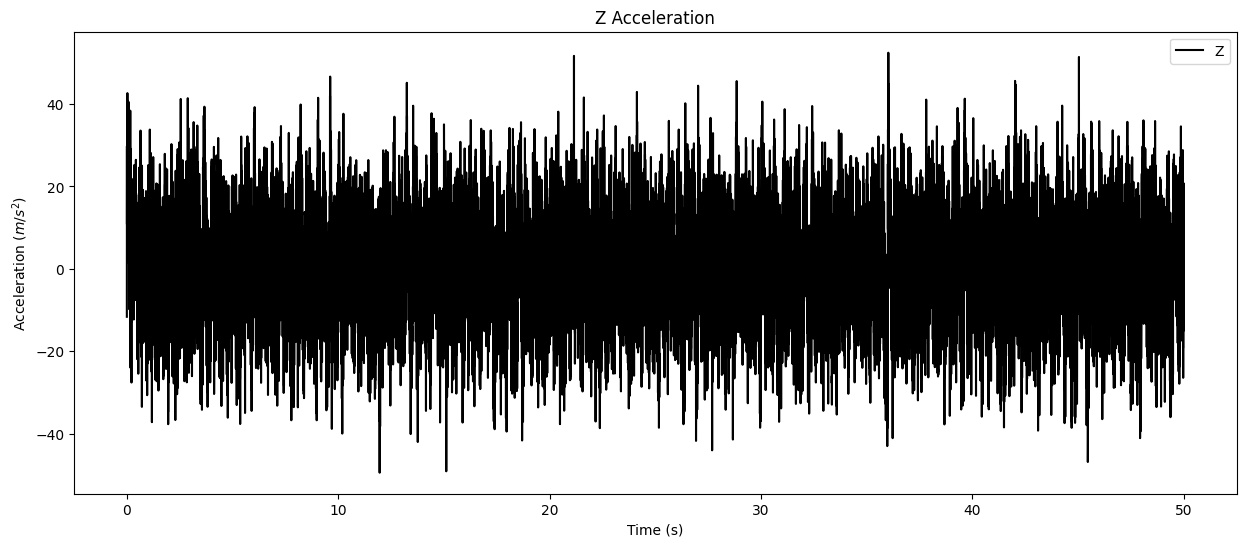

In [9]:
plot.acceleration(df, label, color='k')

## FFT analysis

In [10]:
label_corrected = f'{label}_corrected'
df = analysis.baseline_correction(df, label, label_corrected)

In [11]:
df_fft = analysis.calculate_fft(df, label_corrected)

## Denoising

In [12]:
label_filtered= f'{label} filtered'
threshold_percentage = 10
analysis.fft_filter(df=df, threshold_percentage=threshold_percentage, label=label_corrected, label_filtered=label_filtered)

,Time,Z Acceleration,Z_corrected Acceleration,Z filtered Acceleration
0,0.000,-11.640530,-11.893341,3.668415
1,0.002,18.077248,17.824448,6.808677
2,0.004,29.771322,29.518533,12.217215
3,0.006,10.815710,10.562932,14.854729
4,0.008,15.286013,15.033246,14.433360
...,...,...,...,...
24995,49.990,7.171565,7.195005,-7.294870
24996,49.992,-15.032482,-15.009032,-8.603033
24997,49.994,20.780388,20.803849,-4.226906
24998,49.996,1.108093,1.131566,-1.376059


In [13]:
df_fft = analysis.calculate_fft(df, label_filtered)

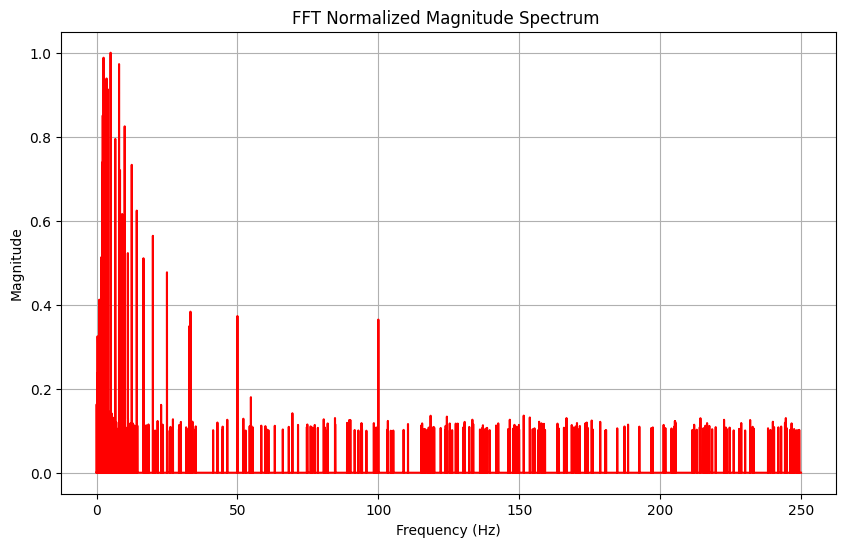

In [14]:
plot.normalized_fft_results(df_fft, label_filtered)

In [15]:
analysis.calculate_fft(df, label)

,Frequency,Z Magnitude
0,0.00,2866.593241
1,0.02,652.261543
2,0.04,1732.543309
3,0.06,4897.024334
4,0.08,2475.009995
...,...,...
12495,249.90,1518.937405
12496,249.92,1976.159804
12497,249.94,2254.651627
12498,249.96,1668.981698


In [16]:
wavelet ='morl'
min_scale = 2
max_scale = 32

In [17]:
spectrum, frequencies = analysis.cwt(df, label, wavelet, min_scale, max_scale)

In [18]:
gif_name = "results/wavelet_spectrum.gif"
file_location_gif = utils.get_file_location(gif_name)

In [19]:
#analysis.wavelet_spectrum(df, label_filtered, wavelet, min_scale, max_scale, file_location_gif)

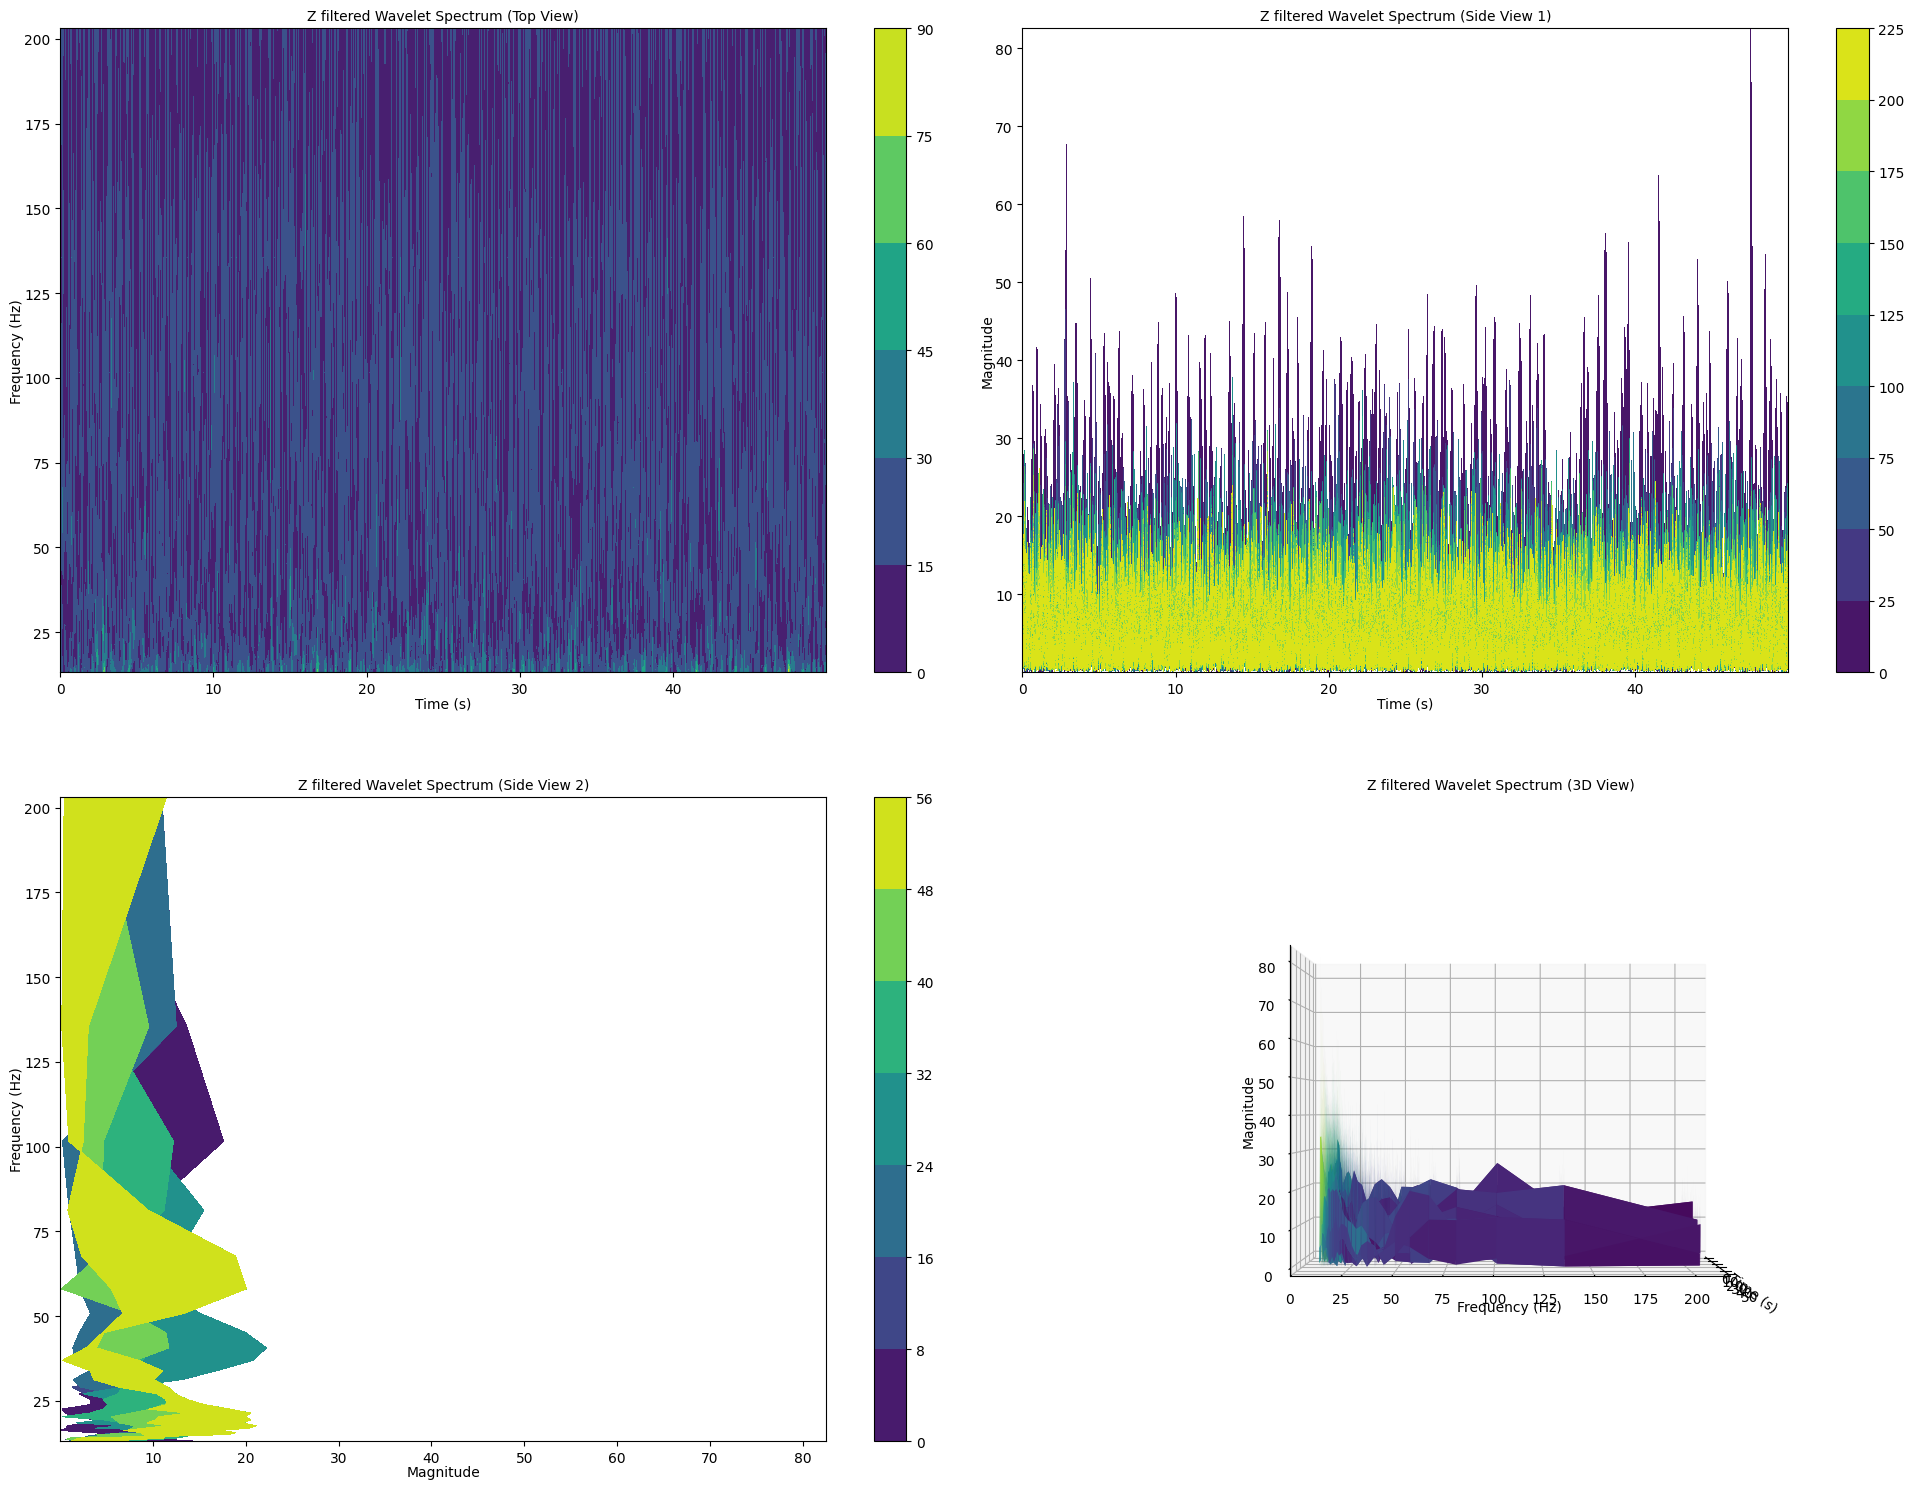

In [20]:
plot.wavelet_spectrum_views(df, spectrum, frequencies, label_filtered)

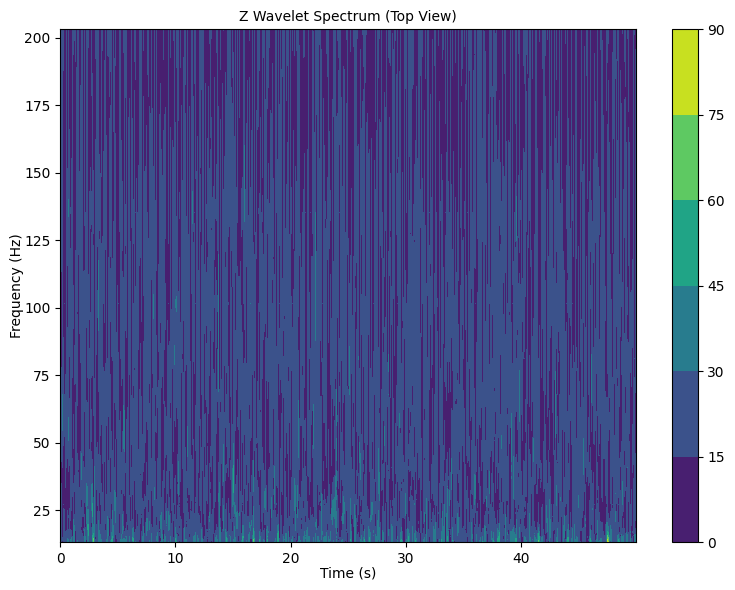

In [21]:
plot.wavelet_spectrum_time_frequency(df, spectrum, frequencies, label)

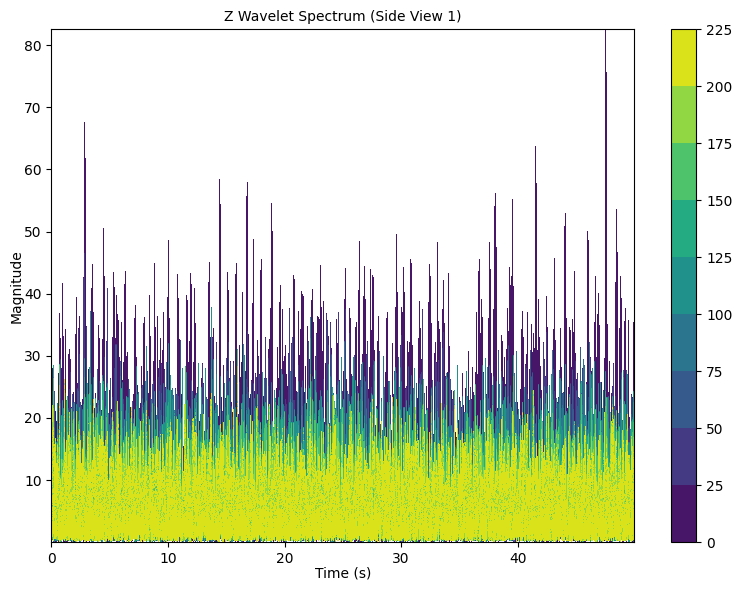

In [22]:
plot.wavelet_spectrum_time_magnitude(df, spectrum, frequencies, label)

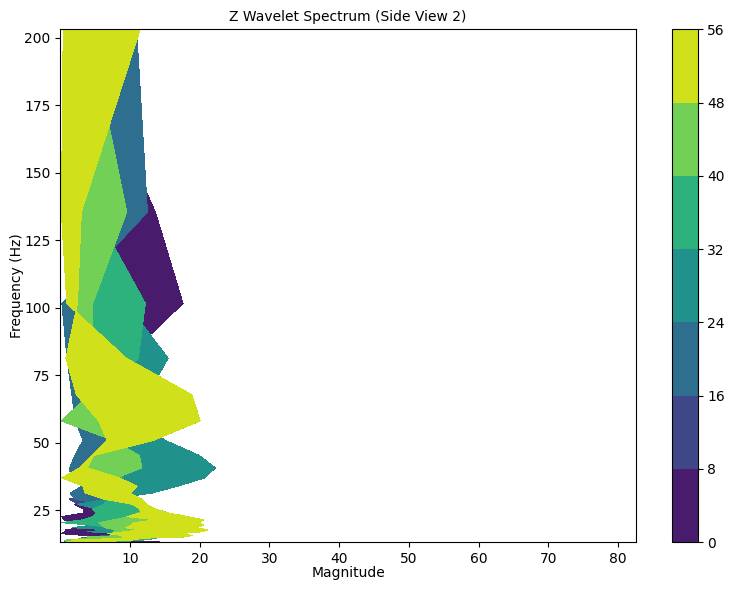

In [23]:
plot.wavelet_spectrum_frequency_magnitude(
    df,
    spectrum,
    frequencies,
    label
)

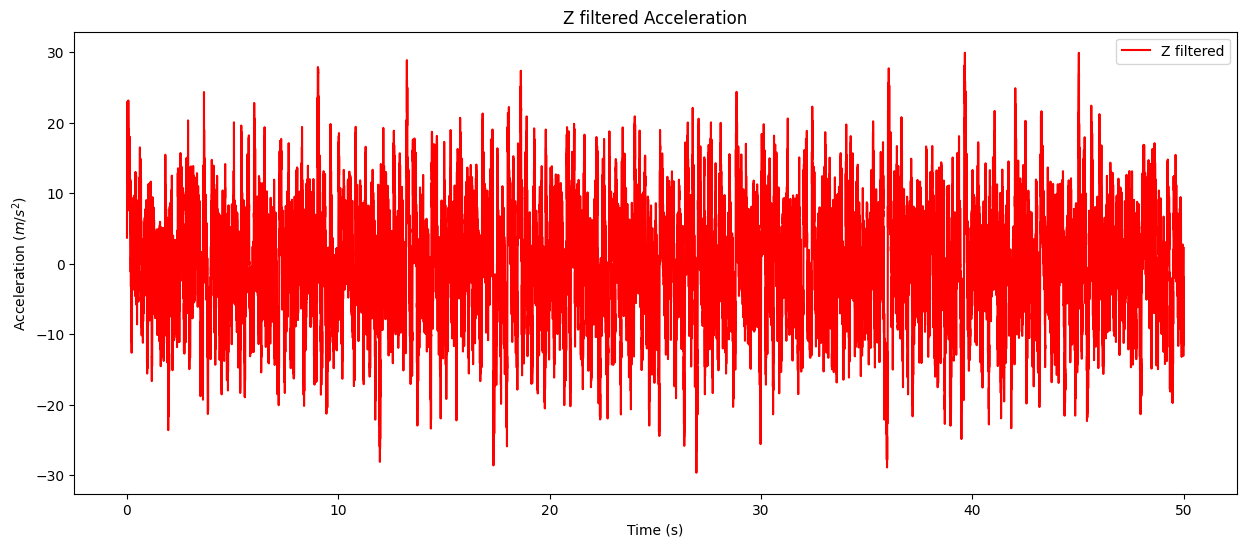

In [24]:
plot.acceleration(df, label_filtered)

In [25]:
df_fft_filtered = analysis.calculate_fft(df, label_filtered)

In [26]:
df_fft

,Frequency,Z filtered Magnitude
0,0.00,1.136868e-12
1,0.02,1.819877e-13
2,0.04,1.556012e-13
3,0.06,5.077690e+03
4,0.08,1.734656e-13
...,...,...
12495,249.90,3.865190e-13
12496,249.92,3.959362e-13
12497,249.94,2.451372e-13
12498,249.96,3.033094e-13


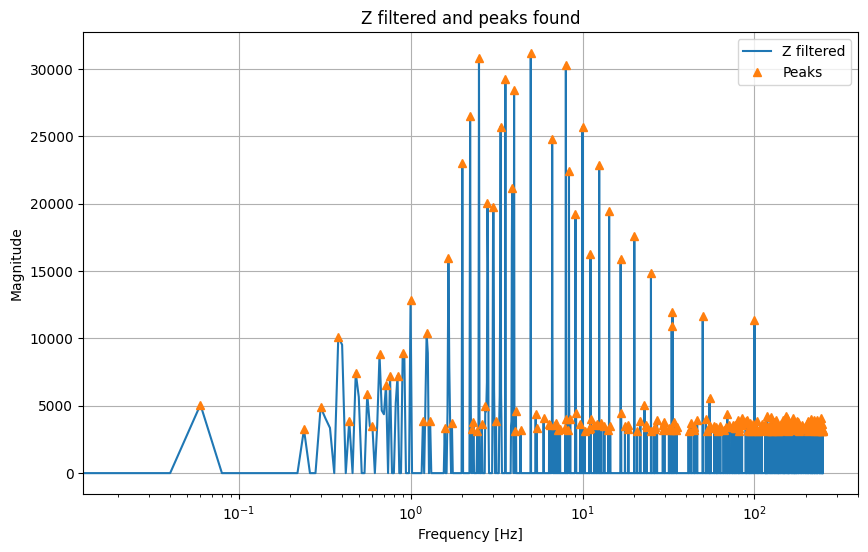

In [27]:
plot.peaks(df_fft, label_filtered, height=1, distance=1, log_scale = True)

In [ ]:
plot.fft_results_period_domain(df_fft, label_filtered, color='blue', log_scale=True)